In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
from fbprophet import Prophet
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [3]:
# load data
df = pd.read_csv("./train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [5]:
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [6]:
# transfer string type date to timestamp and keep day-month-year
df["Datetime"] = df["Datetime"].apply(lambda x: datetime.strptime(x[:10], '%d-%m-%Y')).dt.date

In [7]:
df.head()

,ID,Datetime,Count
0,0,2012-08-25,8
1,1,2012-08-25,2
2,2,2012-08-25,6
3,3,2012-08-25,2
4,4,2012-08-25,2


In [8]:
# Drop ID column
df_train = df.drop("ID", axis = 1)

In [9]:
# rename column name
df_train.rename(columns={"Datetime": "ds", "Count": "y"}, inplace=True)

In [10]:
df_train.tail()

,ds,y
18283,2014-09-25,868
18284,2014-09-25,732
18285,2014-09-25,702
18286,2014-09-25,580
18287,2014-09-25,534


In [11]:
# arrgregate date
df_train = df_train.groupby("ds").agg('sum').reset_index()

In [12]:
# initial Prophet model and fit the training data
model = Prophet()
model.fit(df_train)

INFO:numexpr.utils:Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
# predict additional 7 month data
future = model.make_future_dataframe(periods=210)
forecast = model.predict(future)

In [14]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

            ds          yhat    yhat_lower    yhat_upper
967 2015-04-19  14857.072733  13580.823953  16135.826697
968 2015-04-20  16467.449591  15155.060007  17613.731214
969 2015-04-21  16620.402488  15428.226369  17902.736704
970 2015-04-22  16565.265665  15257.912373  17841.141711
971 2015-04-23  16359.775877  15041.163508  17635.472174


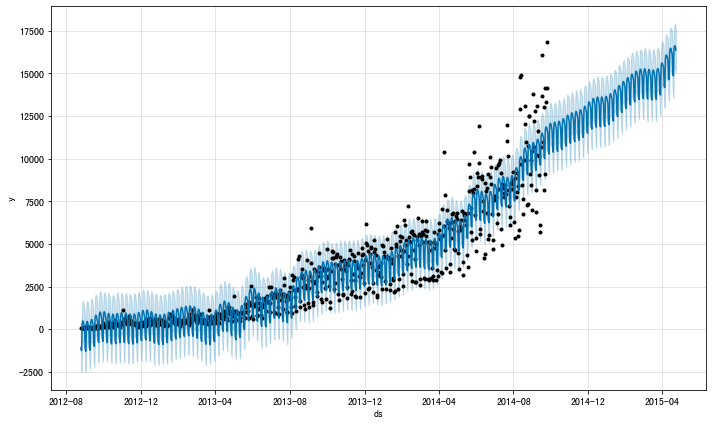

In [15]:
model.plot(forecast)
plt.show()

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


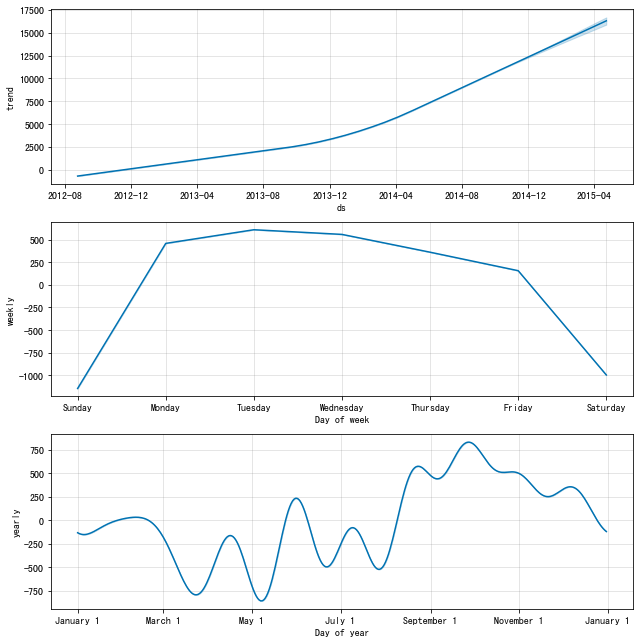

In [16]:
model.plot_components(forecast)
print(forecast.columns)